In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargamos imágenes
dirname = os.path.join(os.getcwd(), '/content/drive/MyDrive/archive.zip (Unzipped Files)/flores')
imgpath = dirname + os.sep 
 
images = []
directories = []
dircount = []
prevRoot=''
cant=0
 
print("leyendo imagenes de ",imgpath)
 
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)

            image=Image.open(filepath)
            new_img = image.resize((100,100))#Redimencionamos todas las imagenes a un mismo tamaño
            new_img.save('s.png','png')#Las guardamos
            image = plt.imread('s.png')
            images.append(image)

            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)
 
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/drive/MyDrive/archive.zip (Unzipped Files)/flores/
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/narciso 1
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/campanilla 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/lirio 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/campana_azul 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/azafran 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/iris 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/lirio_tigre 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/tulipan 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/fritillary 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/girasol 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/margarita 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/pie_de_potro 80
/content/drive/MyDrive/archive.zip (Unzipped Files)/flores/dien

In [ ]:
#Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1360


In [ ]:
#Indicamos la etiquiqueta con el nombre de la flor
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 narciso
1 campanilla
2 lirio
3 campana_azul
4 azafran
5 iris
6 lirio_tigre
7 tulipan
8 fritillary
9 girasol
10 margarita
11 pie_de_potro
12 diente_de_leon
13 primula
14 boton_de_oro
15 flor_de_viento
16 pensamiento


In [ ]:
#convierto de lista a numpy
y = np.array(labels)
X = np.array(images) 


classes = np.unique(y)
nClasses = len(classes)
print('Total de npumero de salidad: ', nClasses)

print('Salida de cada clase : ', classes)

Total de npumero de salidad:  17
Salida de cada clase :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
#Dividimos los datos en datos de entrenamiento y testeo
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.1)
print('Forma de los datos de entrenamiento: ', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

Forma de los datos de entrenamiento:  (1224, 100, 100, 3) (1224,)
Forma de los datos de prueba :  (136, 100, 100, 3) (136,)


Text(0.5, 1.0, 'Clase : 5')

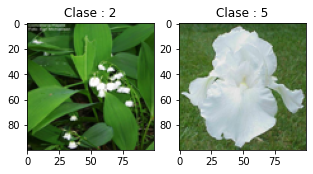

In [ ]:
#Graficamos la primera imagen de testeo y entrenamiento
plt.figure(figsize=[5,5])


plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Clase : {}".format(train_Y[0]))


plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Clase : {}".format(test_Y[0]))

In [ ]:
#Normalizamos
'''train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.'''

"train_X = train_X.astype('float32')\ntest_X = test_X.astype('float32')\ntrain_X = train_X / 255.\ntest_X = test_X / 255."

In [ ]:
# Cambiamos las etiquetas a one-hot encondig
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


print('Etiqueta original:', train_Y[0])
print('Etiqueta en one-hot:', train_Y_one_hot[0])

Etiqueta original: 2
Etiqueta en one-hot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Crear los grupos de entrenamiento y validación
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.1, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1101, 100, 100, 3) (123, 100, 100, 3) (1101, 17) (123, 17)


In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
#flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])



# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/40
56/56 [==============================] - 9s 144ms/step - loss: 2.8282 - accuracy: 0.0562 - val_loss: 2.8884 - val_accuracy: 0.0325
Epoch 2/40
56/56 [==============================] - 8s 137ms/step - loss: 2.7229 - accuracy: 0.0873 - val_loss: 2.8148 - val_accuracy: 0.1463
Epoch 3/40
56/56 [==============================] - 8s 136ms/step - loss: 2.7521 - accuracy: 0.1323 - val_loss: 8.0296 - val_accuracy: 0.0732
Epoch 4/40
56/56 [==============================] - 8s 135ms/step - loss: 3.2521 - accuracy: 0.0635 - val_loss: 3.1478 - val_accuracy: 0.0732
Epoch 5/40
56/56 [==============================] - 8s 136ms/step - loss: 2.4411 - accuracy: 0.1530 - val_loss: 2.9457 - val_accuracy: 0.0407
Epoch 6/40
56/56 [==============================] - 8s 135ms/step - loss: 2.3459 - accuracy: 0.2010 - val_loss: 5.2540 - val_accuracy: 0.0894
Epoch 7/40
56/56 [==============================] - 8s 135ms/step - loss: 2.4431 - accuracy: 0.1991 - val_loss: 2.9713 - val_accuracy: 0.0813
Epoch 

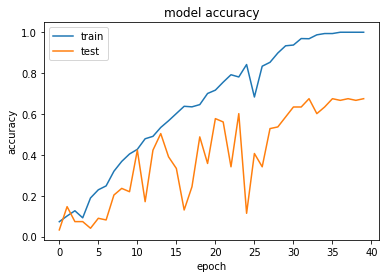

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

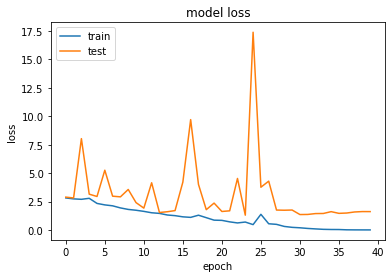

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("flowers_mnist.h5py")

INFO:tensorflow:Assets written to: flowers_mnist.h5py/assets


In [ ]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

9/9 [==============================] - 12s 1s/step - loss: 1.6866 - accuracy: 0.4154
El modelo predice el  41.54411852359772 % de los datos


In [ ]:
print('El modelo predice el ', test_eval[1]*100,'% de los datos')

Test loss: 2.4200644493103027
Test accuracy: 0.2242647111415863


In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(64, activation='relu'))
#flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])



# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/40
56/56 [==============================] - 7s 117ms/step - loss: 11.8442 - accuracy: 0.0691 - val_loss: 2.9161 - val_accuracy: 0.0488
Epoch 2/40
56/56 [==============================] - 6s 113ms/step - loss: 2.8662 - accuracy: 0.0673 - val_loss: 2.8530 - val_accuracy: 0.0813
Epoch 3/40
56/56 [==============================] - 6s 114ms/step - loss: 2.8596 - accuracy: 0.0510 - val_loss: 2.8536 - val_accuracy: 0.0813
Epoch 4/40
56/56 [==============================] - 6s 112ms/step - loss: 2.8549 - accuracy: 0.0406 - val_loss: 2.8905 - val_accuracy: 0.0569
Epoch 5/40
56/56 [==============================] - 6s 114ms/step - loss: 2.8523 - accuracy: 0.0637 - val_loss: 2.8337 - val_accuracy: 0.0650
Epoch 6/40
56/56 [==============================] - 6s 114ms/step - loss: 2.8465 - accuracy: 0.0629 - val_loss: 2.8760 - val_accuracy: 0.0325
Epoch 7/40
56/56 [==============================] - 6s 113ms/step - loss: 2.8539 - accuracy: 0.0430 - val_loss: 2.8720 - val_accuracy: 0.0569
Epoch

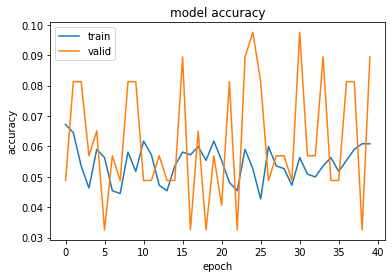

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

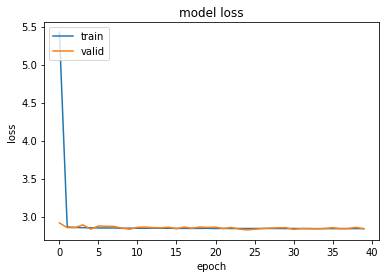

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .5 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(64, activation='relu'))
#flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))





flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])



# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
56/56 [==============================] - 7s 118ms/step - loss: 19.3557 - accuracy: 0.0391 - val_loss: 2.8575 - val_accuracy: 0.0407
Epoch 2/20
56/56 [==============================] - 6s 114ms/step - loss: 2.8472 - accuracy: 0.0448 - val_loss: 2.8306 - val_accuracy: 0.0976
Epoch 3/20
56/56 [==============================] - 6s 114ms/step - loss: 2.8467 - accuracy: 0.0457 - val_loss: 2.8478 - val_accuracy: 0.0488
Epoch 4/20
56/56 [==============================] - 6s 114ms/step - loss: 2.8946 - accuracy: 0.0560 - val_loss: 2.8668 - val_accuracy: 0.0325
Epoch 5/20
56/56 [==============================] - 6s 115ms/step - loss: 2.8444 - accuracy: 0.0543 - val_loss: 2.8576 - val_accuracy: 0.0569
Epoch 6/20
56/56 [==============================] - 6s 114ms/step - loss: 2.8434 - accuracy: 0.0545 - val_loss: 2.8496 - val_accuracy: 0.0488
Epoch 7/20
56/56 [==============================] - 6s 115ms/step - loss: 2.8392 - accuracy: 0.0557 - val_loss: 2.8444 - val_accuracy: 0.0569
Epoch

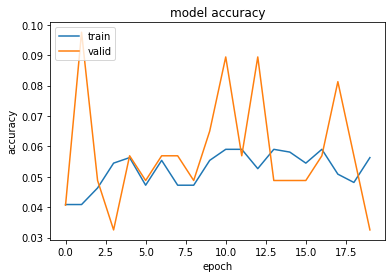

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

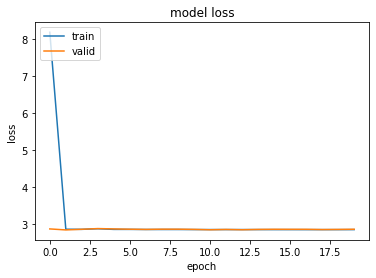

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(64, activation='relu'))
#flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))


Epoch 1/20
56/56 [==============================] - 7s 120ms/step - loss: 2.8301 - accuracy: 0.0911 - val_loss: 2.5126 - val_accuracy: 0.0894
Epoch 2/20
56/56 [==============================] - 7s 117ms/step - loss: 2.3021 - accuracy: 0.2053 - val_loss: 2.0172 - val_accuracy: 0.2276
Epoch 3/20
56/56 [==============================] - 7s 117ms/step - loss: 1.9117 - accuracy: 0.3071 - val_loss: 2.6659 - val_accuracy: 0.2439
Epoch 4/20
56/56 [==============================] - 7s 118ms/step - loss: 1.7311 - accuracy: 0.4839 - val_loss: 4.6114 - val_accuracy: 0.1626
Epoch 5/20
56/56 [==============================] - 7s 118ms/step - loss: 1.8124 - accuracy: 0.5066 - val_loss: 1.5216 - val_accuracy: 0.4715
Epoch 6/20
56/56 [==============================] - 7s 119ms/step - loss: 0.9892 - accuracy: 0.6763 - val_loss: 1.4265 - val_accuracy: 0.5122
Epoch 7/20
56/56 [==============================] - 7s 118ms/step - loss: 0.7821 - accuracy: 0.7690 - val_loss: 2.6329 - val_accuracy: 0.3333
Epoch 

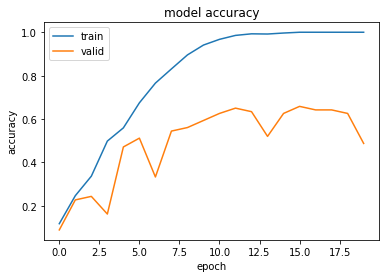

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

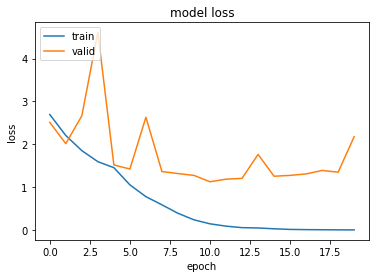

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))


flower_model.add(Flatten())
flower_model.add(Dense(64, activation='relu'))
flower_model.add(Dropout(0.25))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
56/56 [==============================] - 8s 136ms/step - loss: 2.8167 - accuracy: 0.0627 - val_loss: 2.7412 - val_accuracy: 0.1057
Epoch 2/20
56/56 [==============================] - 7s 132ms/step - loss: 2.5957 - accuracy: 0.1628 - val_loss: 2.4717 - val_accuracy: 0.1870
Epoch 3/20
56/56 [==============================] - 7s 133ms/step - loss: 2.2868 - accuracy: 0.2285 - val_loss: 1.9442 - val_accuracy: 0.3171
Epoch 4/20
56/56 [==============================] - 7s 132ms/step - loss: 1.9960 - accuracy: 0.2992 - val_loss: 3.1950 - val_accuracy: 0.2195
Epoch 5/20
56/56 [==============================] - 7s 133ms/step - loss: 2.1890 - accuracy: 0.2993 - val_loss: 2.4393 - val_accuracy: 0.3659
Epoch 6/20
56/56 [==============================] - 7s 132ms/step - loss: 1.8550 - accuracy: 0.3700 - val_loss: 2.5122 - val_accuracy: 0.2114
Epoch 7/20
56/56 [==============================] - 7s 131ms/step - loss: 1.7132 - accuracy: 0.4040 - val_loss: 1.6846 - val_accuracy: 0.3984
Epoch 

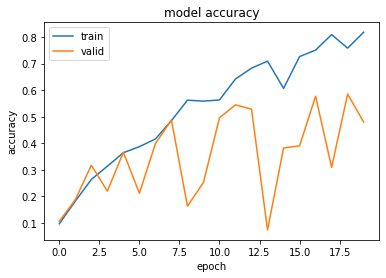

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

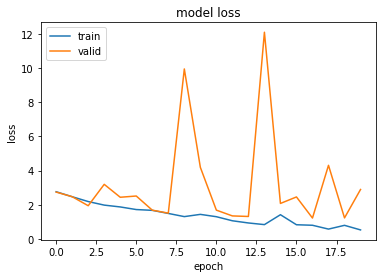

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
56/56 [==============================] - 8s 142ms/step - loss: 2.8126 - accuracy: 0.0614 - val_loss: 7.8593 - val_accuracy: 0.0650
Epoch 2/20
56/56 [==============================] - 8s 136ms/step - loss: 3.2351 - accuracy: 0.0967 - val_loss: 3.1395 - val_accuracy: 0.0650
Epoch 3/20
56/56 [==============================] - 8s 137ms/step - loss: 2.4573 - accuracy: 0.1678 - val_loss: 6.5373 - val_accuracy: 0.0813
Epoch 4/20
56/56 [==============================] - 8s 135ms/step - loss: 2.6903 - accuracy: 0.2249 - val_loss: 5.5072 - val_accuracy: 0.1789
Epoch 5/20
56/56 [==============================] - 8s 136ms/step - loss: 2.2770 - accuracy: 0.2874 - val_loss: 2.9244 - val_accuracy: 0.2602
Epoch 6/20
56/56 [==============================] - 8s 137ms/step - loss: 1.8418 - accuracy: 0.3596 - val_loss: 2.7468 - val_accuracy: 0.1382
Epoch 7/20
56/56 [==============================] - 8s 136ms/step - loss: 2.0663 - accuracy: 0.3242 - val_loss: 2.1125 - val_accuracy: 0.2764
Epoch 

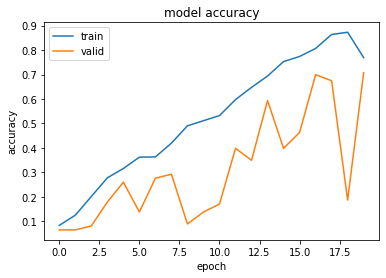

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

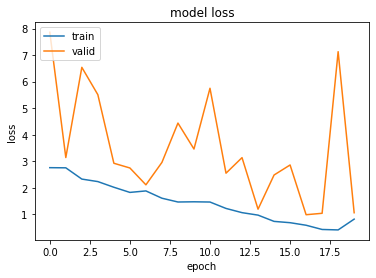

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria


flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((3, 3),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
56/56 [==============================] - 9s 143ms/step - loss: 2.8405 - accuracy: 0.0574 - val_loss: 2.8743 - val_accuracy: 0.0569
Epoch 2/20
56/56 [==============================] - 8s 140ms/step - loss: 2.7610 - accuracy: 0.0971 - val_loss: 2.7924 - val_accuracy: 0.1057
Epoch 3/20
56/56 [==============================] - 8s 138ms/step - loss: 2.5382 - accuracy: 0.1406 - val_loss: 2.4002 - val_accuracy: 0.1138
Epoch 4/20
56/56 [==============================] - 8s 137ms/step - loss: 2.3071 - accuracy: 0.2145 - val_loss: 6.9780 - val_accuracy: 0.1707
Epoch 5/20
56/56 [==============================] - 8s 136ms/step - loss: 3.3280 - accuracy: 0.1026 - val_loss: 2.4588 - val_accuracy: 0.1707
Epoch 6/20
56/56 [==============================] - 8s 136ms/step - loss: 2.3314 - accuracy: 0.1936 - val_loss: 5.1902 - val_accuracy: 0.1463
Epoch 7/20
56/56 [==============================] - 8s 135ms/step - loss: 2.6506 - accuracy: 0.2276 - val_loss: 3.2351 - val_accuracy: 0.2358
Epoch 

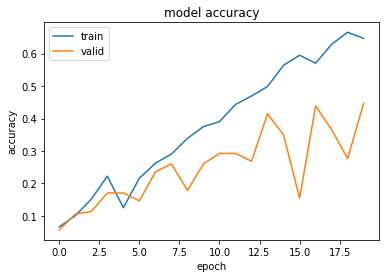

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

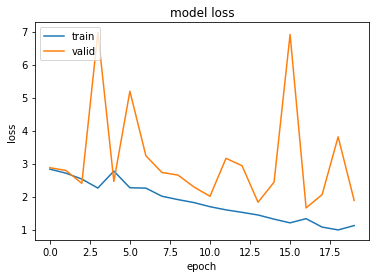

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .05 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))

flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))





flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
56/56 [==============================] - 11s 190ms/step - loss: 2.8277 - accuracy: 0.0831 - val_loss: 2.7761 - val_accuracy: 0.0569
Epoch 2/20
56/56 [==============================] - 10s 185ms/step - loss: 2.6899 - accuracy: 0.1164 - val_loss: 2.8741 - val_accuracy: 0.1545
Epoch 3/20
56/56 [==============================] - 10s 187ms/step - loss: 2.4496 - accuracy: 0.1791 - val_loss: 2.6923 - val_accuracy: 0.1463
Epoch 4/20
56/56 [==============================] - 10s 186ms/step - loss: 2.3005 - accuracy: 0.2531 - val_loss: 3.9004 - val_accuracy: 0.2114
Epoch 5/20
56/56 [==============================] - 10s 186ms/step - loss: 2.5273 - accuracy: 0.2181 - val_loss: 1.8225 - val_accuracy: 0.3333
Epoch 6/20
56/56 [==============================] - 10s 186ms/step - loss: 1.8724 - accuracy: 0.3536 - val_loss: 1.7912 - val_accuracy: 0.3740
Epoch 7/20
56/56 [==============================] - 10s 187ms/step - loss: 1.7751 - accuracy: 0.3803 - val_loss: 2.8933 - val_accuracy: 0.2276

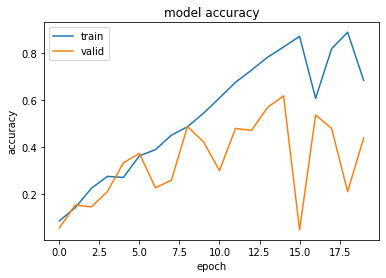

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

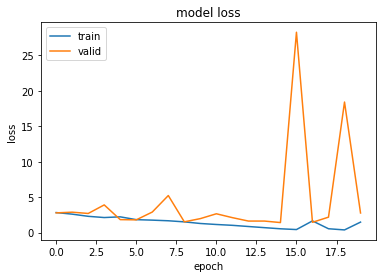

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .035 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))





flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/20
56/56 [==============================] - 13s 216ms/step - loss: 2.8469 - accuracy: 0.0533 - val_loss: 2.7713 - val_accuracy: 0.0488
Epoch 2/20
56/56 [==============================] - 12s 212ms/step - loss: 2.5809 - accuracy: 0.1128 - val_loss: 3.7124 - val_accuracy: 0.1626
Epoch 3/20
56/56 [==============================] - 12s 210ms/step - loss: 3.3502 - accuracy: 0.0927 - val_loss: 4.6274 - val_accuracy: 0.1057
Epoch 4/20
56/56 [==============================] - 12s 209ms/step - loss: 2.7842 - accuracy: 0.1894 - val_loss: 3.4988 - val_accuracy: 0.1789
Epoch 5/20
56/56 [==============================] - 12s 209ms/step - loss: 2.7004 - accuracy: 0.2092 - val_loss: 2.9788 - val_accuracy: 0.1626
Epoch 6/20
56/56 [==============================] - 12s 209ms/step - loss: 2.2030 - accuracy: 0.2594 - val_loss: 2.6737 - val_accuracy: 0.2114
Epoch 7/20
56/56 [==============================] - 12s 209ms/step - loss: 2.0465 - accuracy: 0.3112 - val_loss: 2.9748 - val_accuracy: 0.1707

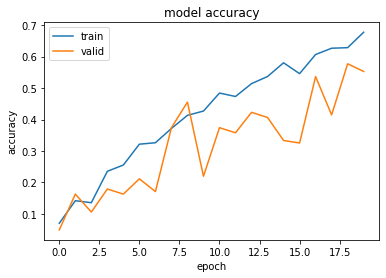

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

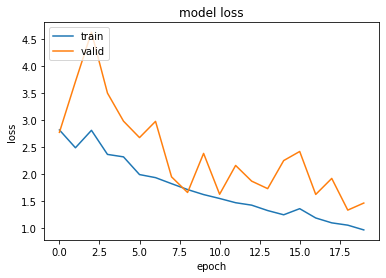

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .035 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 30 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))





flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/30
56/56 [==============================] - 13s 217ms/step - loss: 2.8258 - accuracy: 0.0726 - val_loss: 2.8296 - val_accuracy: 0.0488
Epoch 2/30
56/56 [==============================] - 12s 215ms/step - loss: 2.6203 - accuracy: 0.1423 - val_loss: 2.7788 - val_accuracy: 0.1220
Epoch 3/30
56/56 [==============================] - 12s 212ms/step - loss: 2.4280 - accuracy: 0.1790 - val_loss: 4.5596 - val_accuracy: 0.1057
Epoch 4/30
56/56 [==============================] - 12s 212ms/step - loss: 2.5891 - accuracy: 0.2110 - val_loss: 2.6000 - val_accuracy: 0.1138
Epoch 5/30
56/56 [==============================] - 12s 212ms/step - loss: 2.0583 - accuracy: 0.2894 - val_loss: 3.5532 - val_accuracy: 0.1870
Epoch 6/30
56/56 [==============================] - 12s 211ms/step - loss: 2.3854 - accuracy: 0.2832 - val_loss: 2.5821 - val_accuracy: 0.1870
Epoch 7/30
56/56 [==============================] - 12s 213ms/step - loss: 1.9502 - accuracy: 0.3508 - val_loss: 2.0212 - val_accuracy: 0.2764

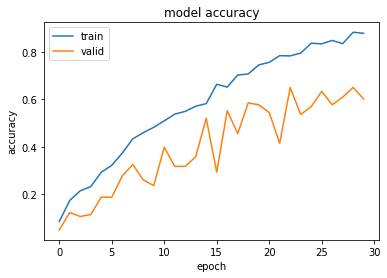

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

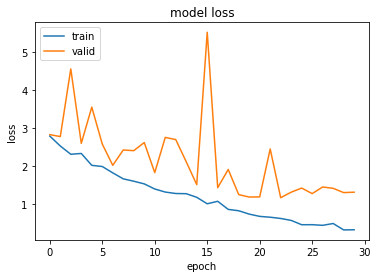

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .03 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 40 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))





flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/40
56/56 [==============================] - 13s 218ms/step - loss: 2.8304 - accuracy: 0.0709 - val_loss: 3.1142 - val_accuracy: 0.0488
Epoch 2/40
56/56 [==============================] - 12s 214ms/step - loss: 2.6824 - accuracy: 0.1440 - val_loss: 2.4150 - val_accuracy: 0.1382
Epoch 3/40
56/56 [==============================] - 12s 212ms/step - loss: 2.3131 - accuracy: 0.2231 - val_loss: 2.6950 - val_accuracy: 0.2520
Epoch 4/40
56/56 [==============================] - 12s 212ms/step - loss: 2.1859 - accuracy: 0.2800 - val_loss: 3.0484 - val_accuracy: 0.2520
Epoch 5/40
56/56 [==============================] - 12s 211ms/step - loss: 2.4040 - accuracy: 0.2781 - val_loss: 2.4405 - val_accuracy: 0.1382
Epoch 6/40
56/56 [==============================] - 12s 211ms/step - loss: 2.0621 - accuracy: 0.3117 - val_loss: 1.8895 - val_accuracy: 0.3171
Epoch 7/40
56/56 [==============================] - 12s 212ms/step - loss: 1.8167 - accuracy: 0.3689 - val_loss: 2.6471 - val_accuracy: 0.2439

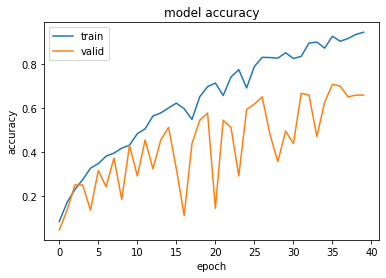

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

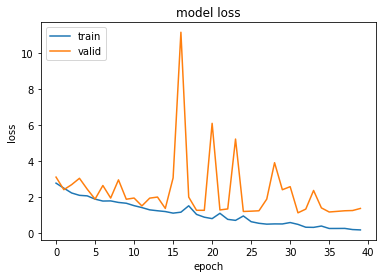

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

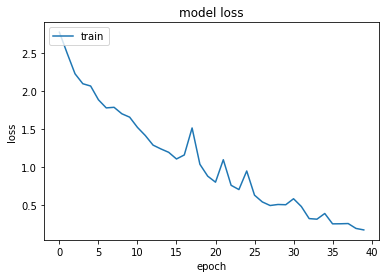

In [ ]:
plt.plot(flower_train.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
INIT_LR = .008 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 60 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 20 # cantidad de imágenes que se toman a la vez en memoria

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same',input_shape=(100,100,3)))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(32, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Conv2D(64, kernel_size=(2, 2),activation='relu',padding='same'))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.2))


flower_model.add(Flatten())
flower_model.add(Dense(512, activation='relu'))
flower_model.add(Dropout(0.3))

flower_model.add(Dense(nClasses, activation='softmax'))




flower_model.compile(loss=keras.losses.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adagrad(lr=INIT_LR),
                     metrics=['accuracy'])

# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, 
                                train_label, 
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(valid_X, valid_label))

Epoch 1/60
56/56 [==============================] - 13s 216ms/step - loss: 2.8470 - accuracy: 0.0593 - val_loss: 2.8297 - val_accuracy: 0.0569
Epoch 2/60
56/56 [==============================] - 12s 213ms/step - loss: 2.7967 - accuracy: 0.0832 - val_loss: 2.7685 - val_accuracy: 0.0488
Epoch 3/60
56/56 [==============================] - 12s 213ms/step - loss: 2.6437 - accuracy: 0.1429 - val_loss: 2.5078 - val_accuracy: 0.0976
Epoch 4/60
56/56 [==============================] - 12s 214ms/step - loss: 2.3859 - accuracy: 0.1771 - val_loss: 2.4552 - val_accuracy: 0.1301
Epoch 5/60
56/56 [==============================] - 12s 214ms/step - loss: 2.3107 - accuracy: 0.2380 - val_loss: 2.2152 - val_accuracy: 0.2114
Epoch 6/60
56/56 [==============================] - 12s 214ms/step - loss: 2.1085 - accuracy: 0.2971 - val_loss: 2.4763 - val_accuracy: 0.1789
Epoch 7/60
56/56 [==============================] - 12s 214ms/step - loss: 2.1968 - accuracy: 0.2923 - val_loss: 2.1408 - val_accuracy: 0.3008

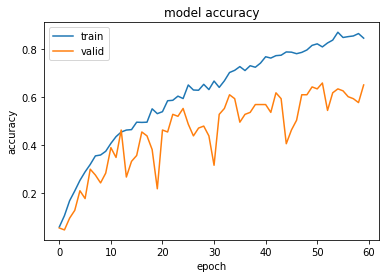

In [ ]:
# summarize history for accuracy
plt.plot(flower_train.history['accuracy'])
plt.plot(flower_train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

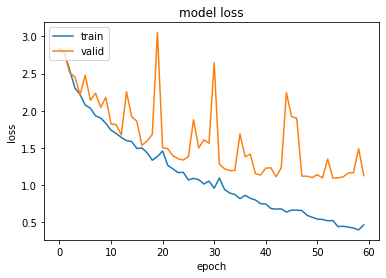

In [ ]:
plt.plot(flower_train.history['loss'])
plt.plot(flower_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()